# Water Pump Functionality Prediction in Tanzania

##### Author: Fridah Kimathi

# **Business Understanding**

<p>Tanzania is a developing country which is in the midst of a water crisis. The country struggles to provide clean water to its population of over 57 million people despite the fact that the country has many established water points. The Tanzanian government through the Ministry of Water aims at resolving the water crisis in the country by maintaining and repairing the water pumps in time. Its Engineers however have a hard time achieving this objective because there is no way to tell which water pumps are currently non functional or are about to fail.
</p>
<p>The project therefore, aims at developing a model that predicts the functionality status of the water pumps in Tanzania as well as provide important insights on the main factors contributing to water pump failure in Tanzania. The model created will enable the Tanzanian Ministry of Water to improve the maintenance operations its water pumps. </p>

### **Importing the required libraries**

In [1]:
# importing pandas for data wrangling and manipulation
import pandas as pd

# numpy for numerical operation and arrays
import numpy as np

# importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

# Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import random

#### **Loading the data**

<ul type='square'><li> The Training values (Predictors) </li> <ul>

In [2]:
train_values = pd.read_csv('Data/Training set values.csv')
#Previewing the first 2 rows
train_values.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


<ul type='square'><li> The Training label</li> <ul>

In [3]:
train_labels = pd.read_csv('Data/Training set labels.csv')
#Previewing the first 2 rows
train_labels.head(2)

,id,status_group
0,69572,functional
1,8776,functional


<ul type='square'><li> The Testing values (Predictors) </li> <ul>

In [4]:
test_values = pd.read_csv('Data/Test Set Values.csv')
#Previewing the first 2 rows
test_values.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


# **Data Understanding**

The data used in this project is from the <a href="https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/">  Pump it Up: Data Mining the Water Table</a> competition hosted by DrivenData, originally sourced by <a href="https://taarifa.org/">Taarifa </a> and the <a href="https://www.maji.go.tz/">Tanzanian Ministry of Water</a>.

In [5]:
test_values.info()

#The test data has 14850 rows and 40 columns.
# It has a mixture of datatypes(int64, float64 and object) with the majority of the features being categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [6]:
train_values.info()
    #The training values dataframe has 59,400 rows and 40 columns.
    # It has a mixture of datatypes(int64, float64 and object) with the majority of the features being categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
train_values.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

<ul type="square"> <b>What each column represents was found </b><a href="https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/">here</a>.</ul>

In [8]:
# Printing the unique values in each column
{column: train_values[column].nunique() for column in train_values.columns}
    #Observations:
        # The 'recorded_by' column has 1 unique value. It would be best to drop this column because its useless in our model.
        # There are columns with high cardinality that might cause issues when One Hot Encoding is done.

{'id': 59400,
 'amount_tsh': 98,
 'date_recorded': 356,
 'funder': 1897,
 'gps_height': 2428,
 'installer': 2145,
 'longitude': 57516,
 'latitude': 57517,
 'wpt_name': 37400,
 'num_private': 65,
 'basin': 9,
 'subvillage': 19287,
 'region': 21,
 'region_code': 27,
 'district_code': 20,
 'lga': 125,
 'ward': 2092,
 'population': 1049,
 'public_meeting': 2,
 'recorded_by': 1,
 'scheme_management': 12,
 'scheme_name': 2696,
 'permit': 2,
 'construction_year': 55,
 'extraction_type': 18,
 'extraction_type_group': 13,
 'extraction_type_class': 7,
 'management': 12,
 'management_group': 5,
 'payment': 7,
 'payment_type': 7,
 'water_quality': 8,
 'quality_group': 6,
 'quantity': 5,
 'quantity_group': 5,
 'source': 10,
 'source_type': 7,
 'source_class': 3,
 'waterpoint_type': 7,
 'waterpoint_type_group': 6}

> #### **Identifying and Removing Irrelevant columns**
The training values dataframe has a lot of columns that either represent the same thing or are irrelevant to the model that will be built. To make data understanding easier, the columns will be dropped.


 <ul type='square'><li>Creating a function to remove irrelevant columns</li> <ul>

In [9]:
def irrelevant_columns(data, columns):
    """
    Function for removing that either represent the same thing or are irrelevant to the model that will be built
    """                   
    cleaned_df = data.drop(columns, axis=1)
    return cleaned_df

In [10]:
irrelevant_columns1 = ['wpt_name', 'num_private', 'subvillage', 'region', 'lga',\
                       'ward', 'recorded_by', 'scheme_name', 'scheme_management', 'extraction_type', \
                        'extraction_type_group', 'management_group','payment', 'quality_group', 'quantity', 'source', 'waterpoint_type'] 

train_values = irrelevant_columns(train_values, irrelevant_columns1)
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,...,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,...,False,1999,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,...,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,21,...,True,2009,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,...,True,1986,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,18,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe


In [11]:
# Statistical summary of the dataframe 
train_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


##### Observations
<ul> <li>There are 59400 rows in the training dataset.</li>
     <li>The population are the water pumps ranges from 0 to 30500.</li>
     <li>There are wells with there construction year as zero. The oldest well in the dataset is in 2013.</li>
</ul>


 #### **1. Visualizing the functional status of the water pumps**

In [12]:
train_labels['status_group'].value_counts(normalize=True)
    # Majority of the water pumps are either functional or non-functional and very few are functional but need repair.

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

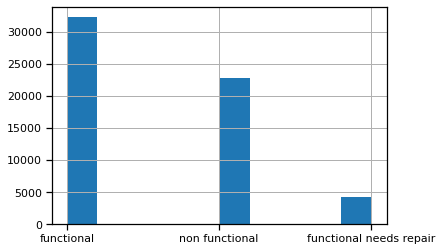

In [13]:
train_labels['status_group'].hist();
    #Majority of the water pumps are functional

 #### **2. Visualizing the effect of water well location on the functionality status of the water pumps**

In [14]:
#Joining the training values and labels
training_data = pd.concat([train_values, train_labels.drop('id', axis=1)], axis=1)
training_data.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,...,construction_year,extraction_type_class,management,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,...,1999,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,...,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional


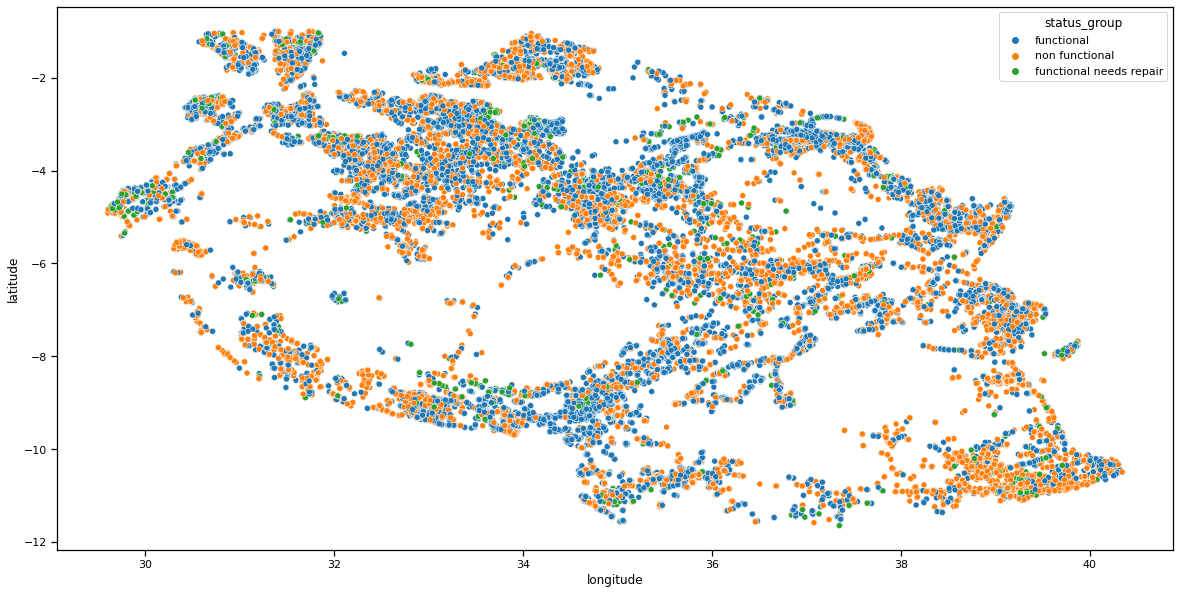

In [15]:
fig, ax  = plt.subplots(figsize=(20,10))
loc_data = training_data.loc[(training_data.longitude>0) & (training_data.latitude<0)]
sns.scatterplot(data=loc_data, x="longitude", y="latitude", hue="status_group", ax=ax);

        #Observations:
         # For the majority of the country the functionality status of the water pumps is evenly distributed.
         # The South Eastern and western part of the country has a lot of non-functional pumps
         # There are areas with no pumps at all. Probably areas with no inhabitants such as forests or game reserves.

 #### **3. Visualizing the effect of water quality on the functionality status of the water pumps**

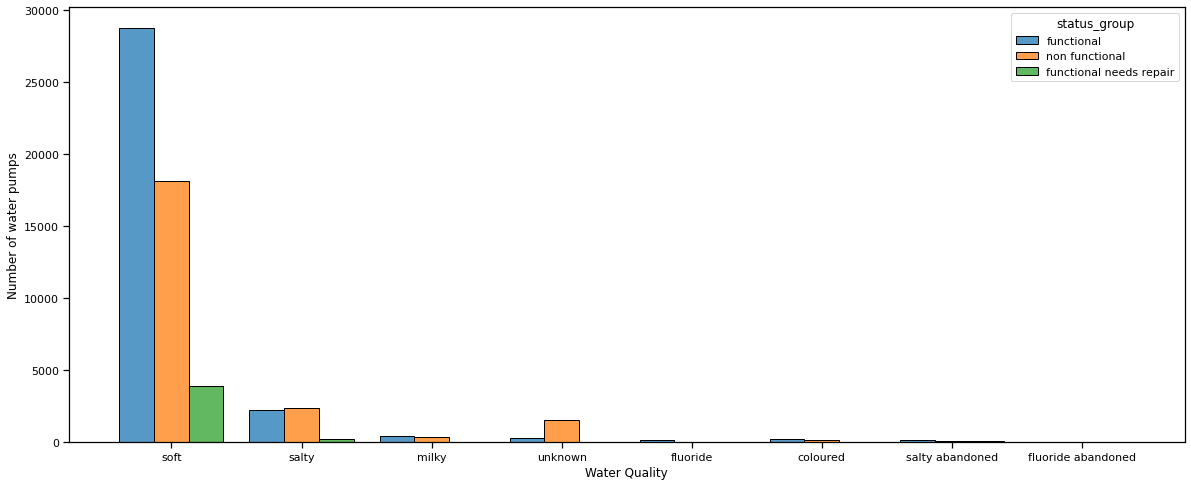

In [16]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=training_data, x="water_quality", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel("Water Quality")
ax.set_ylabel("Number of water pumps");

        #Observations
            # The water quality in majority of the water pumps is soft. 
            # The functional water pumps in the soft water is more than the non-functional.
            # The non functional water pumps in the salty water is slightly more than the functional water pumps.
            # In all the different types of water quality, the pumps that are functional but need repair are minimal. 

 #### **4. Visualizing if the payment type influences the functionality status of the water pumps**

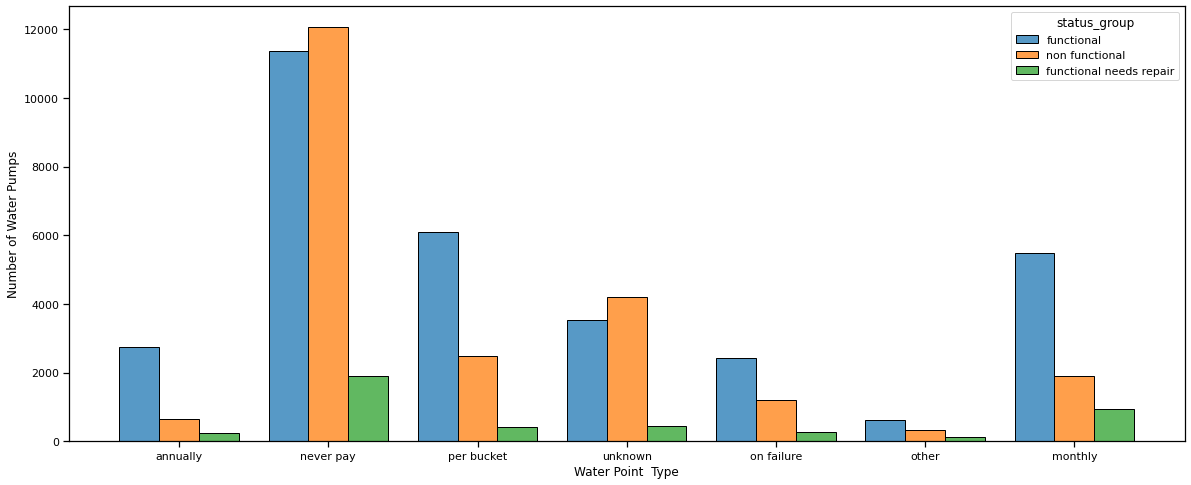

In [17]:
pop_status = training_data.groupby(['status_group'])['population'].sum()

fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=training_data, x="payment_type", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel('Water Point  Type')
ax.set_ylabel('Number of Water Pumps');

#Observations:
 #Never pay has the highest number of functional and non functional water pumps. 
 # The non functional water pumps slightly outweigh the functional ones in never pay and unknown payment type.
 # Majority of the payed water pumps have more functional than non functional water pumps.

 #### **5. Visualizing the effect of the water point type on the functionality status of water pumps**

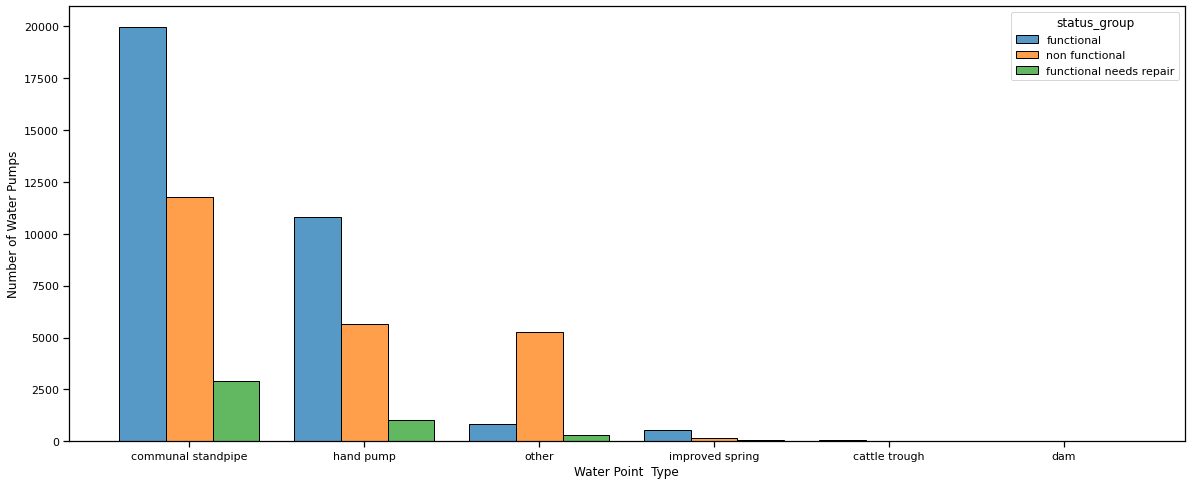

In [18]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=training_data, x="waterpoint_type_group", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel('Water Point  Type')
ax.set_ylabel('Number of Water Pumps');

    # Observations:
        # The most common type of water point is a communal standpipe
        # The type of water point referenced by 'other' has more non-functional water pumps than functional ones.

 #### **6. Visualizing if the functionality status of water pumps is influenced by the construction year**

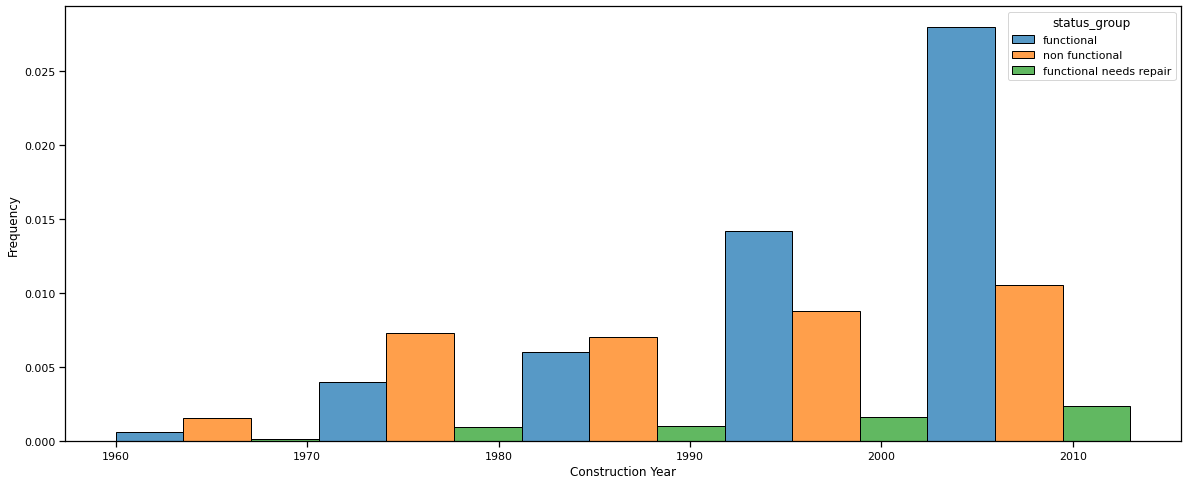

In [19]:
year = training_data[training_data['construction_year'] >0]
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=year, x='construction_year', stat='density', hue='status_group', multiple='dodge',bins=5, ax=ax)
ax.set_xlabel('Construction Year')
ax.set_ylabel('Frequency');

    # Observations:
      # For water pumps constructed in the year 1990 and below, the water pumps in need of repair outweigh water pumps that don't need repair.


#### **7. Visualizing the effect of water source to the functionality of the water pumps**

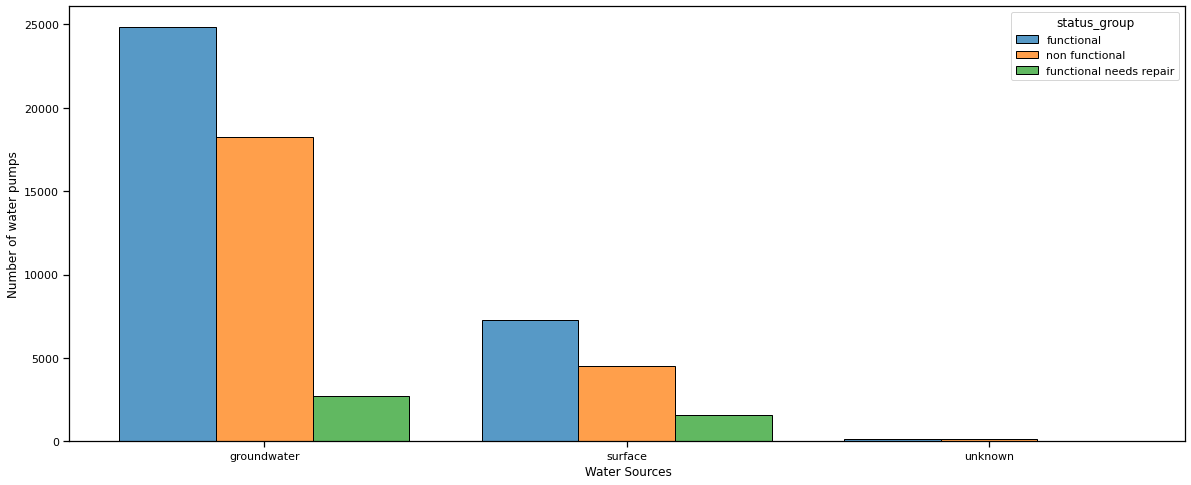

In [20]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=training_data, x="source_class", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel(' Water Sources')
ax.set_ylabel('Number of water pumps');

        # Observations:
         # There are two known water sources; ground and surface
         # Majority of the water sources are ground water

#### **8. Visualizing the effect of water source type to the functionality of the water pumps**

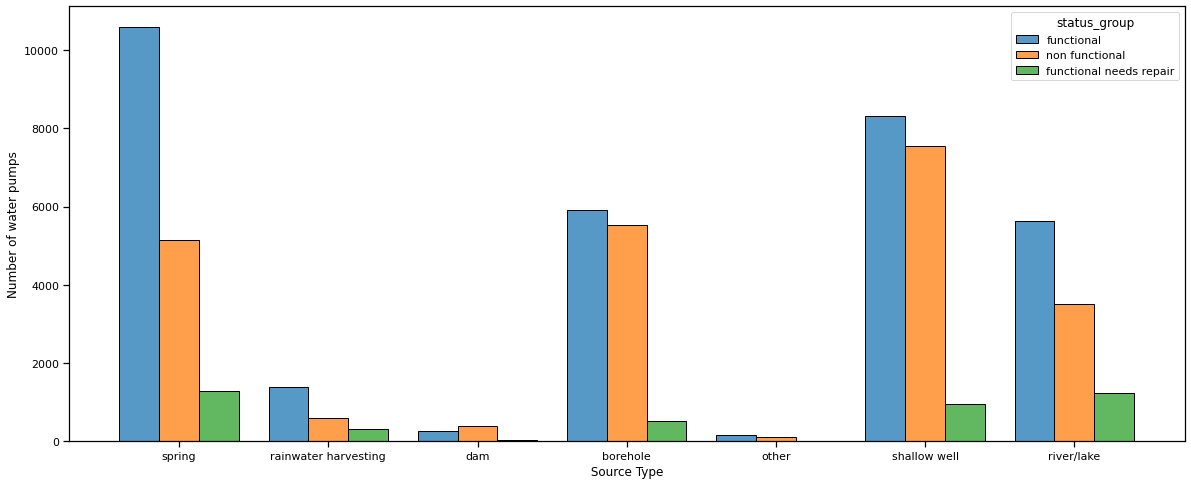

In [21]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=training_data, x="source_type", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel(' Source Type ')
ax.set_ylabel('Number of water pumps');

        # Observations:
         # There are six water types.
         #  Except for dams,the functional pumps outweigh the non-functional pumps 

#### **9. Visualizing the effect of water quantity in a well to the functionality of the water pumps**

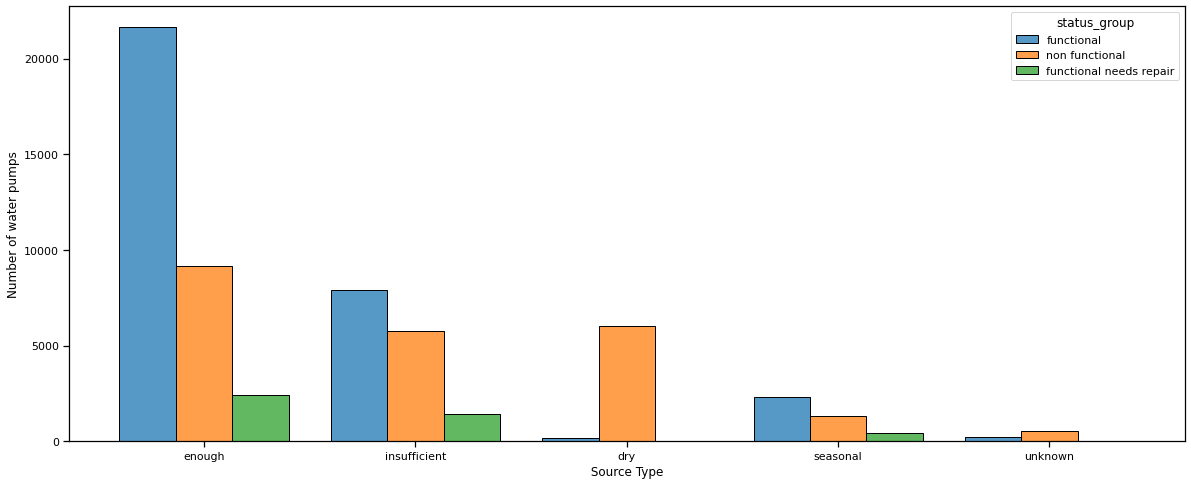

In [22]:
fig, ax  = plt.subplots(figsize=(20,8))
sns.histplot(data=training_data, x="quantity_group", hue="status_group", multiple="dodge", shrink=.8, ax=ax)
ax.set_xlabel(' Source Type ')
ax.set_ylabel('Number of water pumps');

        # Observations:
         #In regions where there is water, the functional water pumps outweigh the non_functional
         # In wells where there is no water(dry) the non_functional water pumps significantly outweigh the functional 

# **Data Preparation**

 #### **1. Identifying and dealing with high cardinality**

In [23]:
def check_high_cardinality(data):
    cat_cols = [i for i in data.columns if data[i].dtype in ['O']]
    high_card_columns = [col for col in cat_cols if len(data[col].value_counts().index) > 1000]
    return high_card_columns

In [24]:
high_card_columns = check_high_cardinality(train_values)
high_card_columns

['funder', 'installer']

In [25]:
def check_placeholders(data):
    
    """ A function for checking for placeholders in the dataframe"""

    for column in data.columns:
        print(data[column].value_counts(normalize=True))
        print('***************************************************\n')

In [26]:
check_placeholders(train_values[high_card_columns])

Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
                            ...   
If                        0.000018
Kwamdulu Estate           0.000018
Malola                    0.000018
Salehe                    0.000018
Primo Zunda               0.000018
Name: funder, Length: 1897, dtype: float64
***************************************************

DWE                     0.312171
Government              0.032738
RWE                     0.021634
Commu                   0.019015
DANIDA                  0.018836
                          ...   
Mkulima                 0.000018
Warento                 0.000018
Mwananchi Engineeri     0.000018
Heri mission            0.000018
VILLAGE COUNCIL .ODA    0.000018
Name: installer, Length: 2145, dtype: float64
***************************************************



<ul>
   <li>Columns  funder and installer both have over 1800 values that will be an issue when One hot Encoding is performed. The values in this two columns will be reduced in 5 values that is, the top 4 largest funders/installer and the rest of the values will be marked as 'other'</li>
 </ul>

 <ul type='square'><li>Created a function to remove high cardinality </li> <ul>

In [27]:
def redu_high_cardinality(data):
    """ 
    function to remove high cardinality in the 'funder' and 'installer' columns
    """
    data[['funder']]= data[['funder']].where(data[['funder']].apply(lambda x: x.map(x.value_counts()))>= 1374, 'other')

    data[['installer']] = data[['installer']].where(data[['installer']].apply(lambda x: x.map(x.value_counts()))>=1060, 'other')
    return data

In [28]:
train_values = redu_high_cardinality(train_values)

In [29]:
check_high_cardinality(train_values)

[]

 #### **2. Identifying and dealing with missing values**
 <ul type='square'><li>Created a function to print out column(s) with missing data in the dataframe. </li> <ul>

In [30]:
def is_missing(data):
    """ 
    A function that return columns with missing values
    """
    return {column:data[column].isnull().sum() for column in data.columns if data[column].isnull().sum()}

In [31]:
is_missing(train_values)  


{'public_meeting': 3334, 'permit': 3056}

In [32]:
train_values['permit'].value_counts()

#This column is made of booleans. The missing values will be replaced at random with either True or False 

True     38852
False    17492
Name: permit, dtype: int64

 <ul type='square'><li>Created a function to deal with missing data in the dataframe. </li> <ul>

In [33]:
def remove_missing(data):
    #column with missing values
    col_missing = [column for column in data.columns if data[column].isnull().sum()]
    data[col_missing[0]] = data[col_missing[0]].fillna(random.choice(data[col_missing[0]][data[col_missing[0]].notna()]))
    data[col_missing[1]] = data[col_missing[1]].fillna(random.choice(data[col_missing[1]][data[col_missing[1]].notna()]))
    return data

In [34]:
train_values = remove_missing(train_values)

In [35]:
#Confirming that the missing values have been removed.
is_missing(train_values)

{}

 #### **3. Data Type Conversion**

In [36]:
train_values.info()

    #Observations:
        #The datatypes of all columns are correct expect for the construction_year, date_recorded and permit
        # Data_recorded and construction year will be used to make a new column 'Age'
        # The datatype of both columns will therefore not be changed at the moment.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  population             59400 non-null  int64  
 12  public_meeting         59400 non-null  bool   
 13  permit                 59400 non-null  bool   
 14  construction_year      59400 non-null  int64  
 15  ex

In [37]:
train_values['construction_year'].value_counts(normalize=True)

# 34% of the dates have a place holder of 0.
# The column datatype will therefore be kept as is because the it cannot be changed to datetime where there is zero.
# We also cannot drop all those rows with construction year as zero or drop the construction_year column
    # because it might be necessary for the model.

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [38]:
binary_enc = OrdinalEncoder()
permit_encoded = binary_enc.fit_transform(train_values[['permit']])
public_meeting_encoded = binary_enc.fit_transform(train_values[['public_meeting']])
permit_encoded = permit_encoded.flatten()
public_meeting_encoded = public_meeting_encoded.flatten()
train_values['public_meeting'] = public_meeting_encoded
train_values['permit'] = permit_encoded


In [39]:
train_values.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
region_code                int64
district_code              int64
population                 int64
public_meeting           float64
permit                   float64
construction_year          int64
extraction_type_class     object
management                object
payment_type              object
water_quality             object
quantity_group            object
source_type               object
source_class              object
waterpoint_type_group     object
dtype: object

 #### **4. Identifying and dealing with duplicates**
<ul type='square'><li>Checking for duplicates using the column 'id' </li> <ul>

In [40]:
train_values['id'].duplicated(keep=False).sum()

#The data has no duplicates.

0

 #### **5. Identifying and dealing with outliers and placeholders**

In [41]:
def visualize_outliers(data):
    """ 
    Function for visualizing outliers in the continuous columns using a histogram.
    """
    cont_cols = [i for i in data.columns if data[i].dtype in ['float64', 'int64']]
    
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(22,10))
    for i, col in enumerate(data[cont_cols].drop(['id', 'permit', 'region_code', 'district_code', 'public_meeting'], axis=1).columns):
        ax = axes[i//3][i%3]
        sns.histplot(data[col],bins=10 ,kde=True, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel("Number of water pumps")
    fig.set_tight_layout(True);

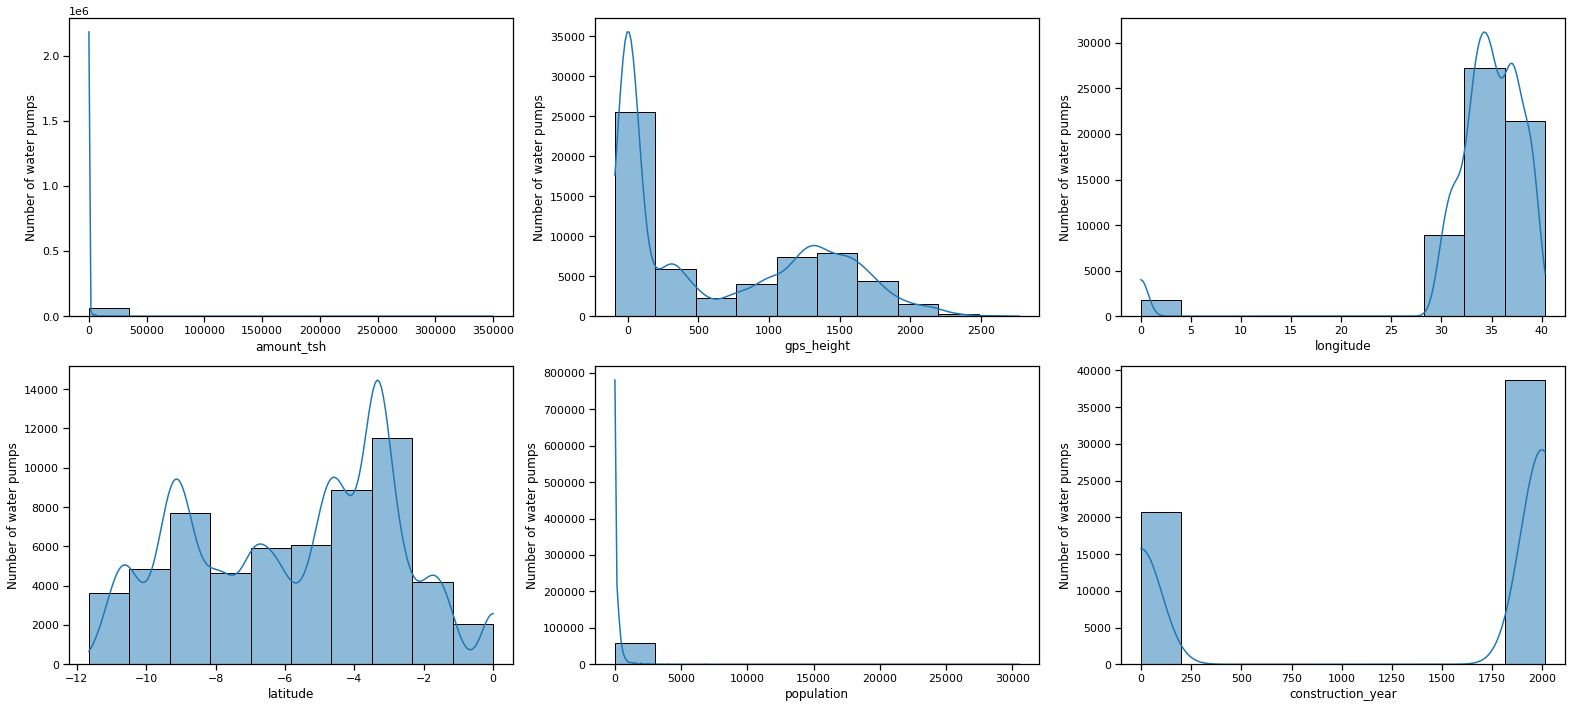

In [42]:
visualize_outliers(train_values)

In [43]:
#Checking for outliers using the check_placeholders function created earlier

check_placeholders(train_values.drop('id', axis=1))

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64
***************************************************

2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2011-08-30    0.000017
2011-09-13    0.000017
2011-09-12    0.000017
2012-01-21    0.000017
2011-09-28    0.000017
Name: date_recorded, Length: 356, dtype: float64
***************************************************

other                     0.734444
Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
Name: funder, dtype: float64
***************************************************

 0       0.344074
-15      0.001010
-16      0.000926
-13  

**_Observations_**:
 <ul type='square'> 
    <li>For column amount_tsh, 70% of it has value 0. This might be a place holder for missing values, which could bring issues to our model and is also an indication that this column might not be beneficial to the model. The zeros can be replaced with a median of the column.There are also columns with larger values, but this is normal as this might be the amount of water available at those waterpoints.</li>
    <li>For column gps_height, 34% of the values is 0.This might be another placeholder for missing values. The zeros can be replaced with the median of this column.</li>
    <li>The longitude and latitude columns also seem to have placeholders in them that signal to missing values. For longitude that is 0 and for latitude that is -2.000000e-08. In both columns, the placeholders represent only 3% of the values. To avoid losing valuable data in other columns, this placeholders will also be replaced with the median.</li>
    <li> For population, 35% of the values is 0 and 11% are represented by 1. The zeros might be a placeholder for missing values. This can be replaced with the median. However, the fact the 47% of the values are represented by either 0 or 1 is an indication that this particular column might not be useful to our model. </li>
    <li>For construction_year, 34% of the values are 0. This could be placeholder for wells whose construction year is unknown.Zero will also be replaced with the median</li>
    <li>For management column, there are two values that seem to represent the same thing,i.e, 'other' and 'unknown'. This can be combined to form just one value represented by 'other' and 'other - school' can be changed to 'school'</li>
    <li>For payment_type, the two values 'other' and 'unknown' will be combined to form one value, 'other'</li>
 </ul>

<b>
 i. Replacing the placeholders identified
</b>

In [44]:
null_values = {'amount_tsh':0,
                     'gps_height':0,
                     'longitude':0,
                     'latitude':-2.000000e-08,
                     'population':0,
                     'construction_year':0}
                     
for feature, null in null_values.items():
    train_values[feature] = train_values[feature].replace(null, np.nan)
col_placeholders = is_missing(train_values)

In [45]:
simple_imputer = SimpleImputer(strategy='median')
placeholder_replaced = simple_imputer.fit_transform(train_values[col_placeholders])
placeholder_replaced = pd.DataFrame(placeholder_replaced, columns=train_values[col_placeholders].columns, index=train_values.index)
train_values = train_values.drop(train_values[col_placeholders].columns, axis=1)
train_values = pd.concat([train_values, placeholder_replaced], axis=1)
train_values.head(3)

,id,date_recorded,funder,installer,basin,region_code,district_code,public_meeting,permit,extraction_type_class,...,quantity_group,source_type,source_class,waterpoint_type_group,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,69572,2011-03-14,other,other,Lake Nyasa,11,5,1.0,0.0,gravity,...,enough,spring,groundwater,communal standpipe,6000.0,1390.0,34.938093,-9.856322,109.0,1999.0
1,8776,2013-03-06,other,other,Lake Victoria,20,2,1.0,1.0,gravity,...,insufficient,rainwater harvesting,surface,communal standpipe,250.0,1399.0,34.698766,-2.147466,280.0,2010.0
2,34310,2013-02-25,other,other,Pangani,21,4,1.0,1.0,gravity,...,enough,dam,surface,communal standpipe,25.0,686.0,37.460664,-3.821329,250.0,2009.0


<b> Visualizing outliers again to see the changes that have taken place </b>

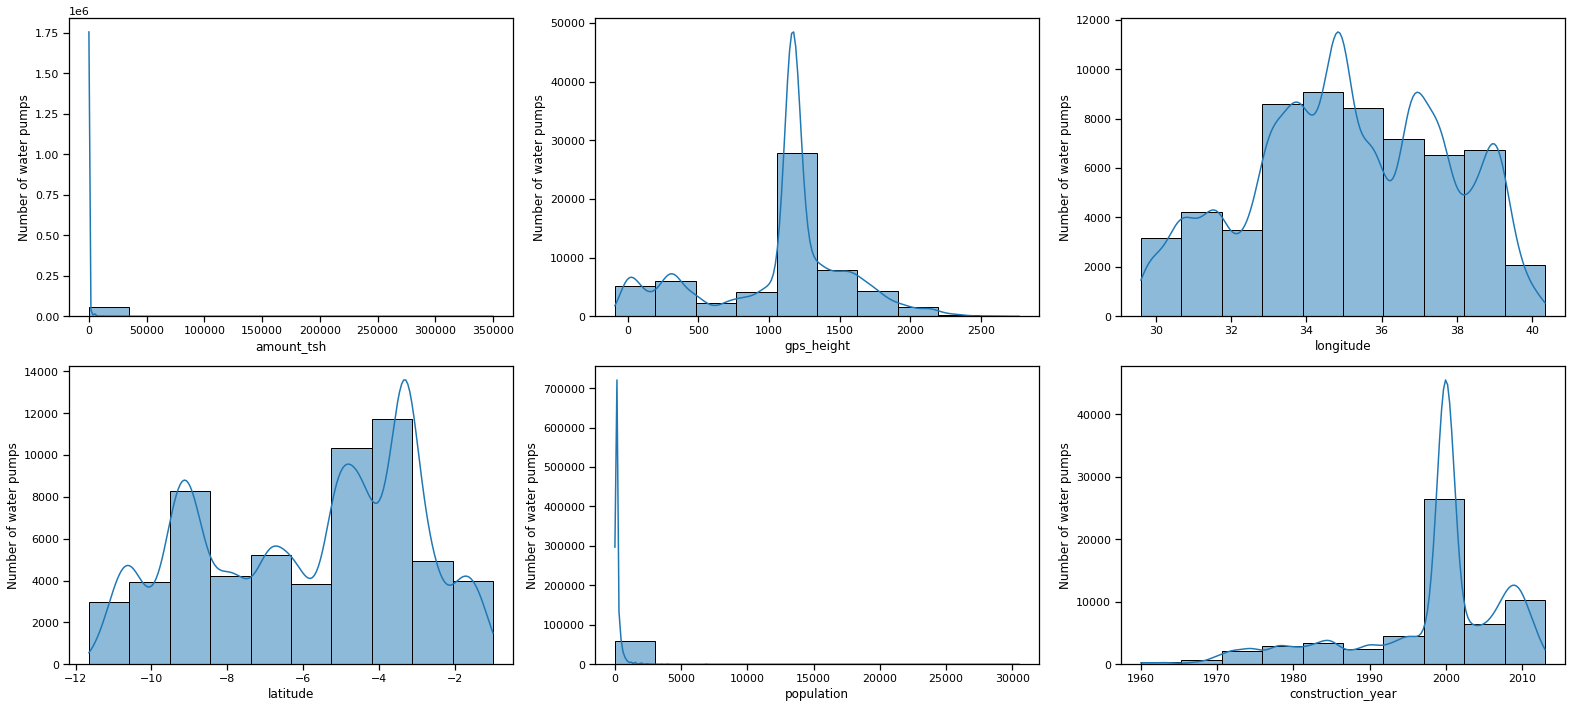

In [46]:
visualize_outliers(train_values)

<b>
 ii. Replacing similar values in particular columns with a common phrase
</b>

In [47]:
def replace_val(data):
    """ 
    Function to replace similar values in particular columns with a common phrase.
    """
    data['management'] = data['management'].replace({'unknown': 'other', 'other - school':'school'})

    data['payment_type'] = data['payment_type'].replace({'unknown': 'other', \
                                                         'per bucket':'pay(annual/per_bucket/on_failure/monthly)',\
                                                         'monthly': 'pay(annual/per_bucket/on_failure/monthly)',\
                                                         'on failure':'pay(annual/per_bucket/on_failure/monthly)',\
                                                         'annually':'pay(annual/per_bucket/on_failure/monthly)'})

    data['waterpoint_type_group'] = data['waterpoint_type_group'].replace(['improved spring', 'cattle trough','dam'], 'other')
    data['water_quality'] = data['water_quality'].replace({'salty abandoned': 'salty', 'fluoride abandoned':'fluoride'})
    return data

In [48]:
train_values = replace_val(train_values)

 #### **6. Checking for and removing multicolinearity**

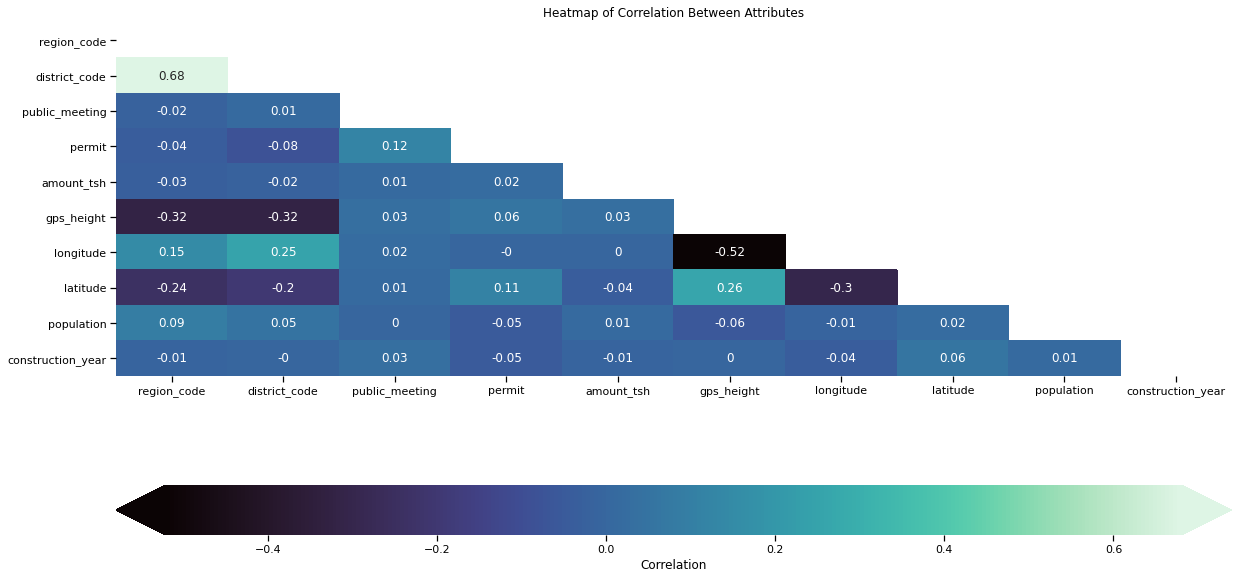

In [49]:
# df with the correlation matrix
train_data = pd.concat([train_values, train_labels], axis=1)
train_corr = round(train_data.drop('id', axis=1).corr(), 2)

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(20,10))

# Plotting a heatmap of the correlation matrix(train_corr), with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifying the data to be plotted
    data = train_corr,

    # The mask is used to ensure duplicates are not shown
    mask=np.triu(np.ones_like(train_corr, dtype=bool)),

    # Specifying the that the existing axes (ax) should be used
    ax=ax,
    
    # Specifying that the labels should be shown too.
    annot=True,
     
    # Customizing the  colorbar appearance
    cmap="mako",
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    
)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

**_Observations_**:
 <ul type='square'> 
   <li> There is no high multicolinearity.</li> </ul>

#### **7. Feature Engineering**

In [50]:
def age(data):
    year_recorded = [date[:4] for date in data['date_recorded']]
    year_recorded = pd.DataFrame(year_recorded, columns=['year_recorded'], index=data.index)
    data['year recorded'] = year_recorded.astype('float64')
    data['age'] = data['year recorded'] - data['construction_year']

    return data

In [51]:
train_values = age(train_values)

#### **8. Splitting the train_values and train_labels into train and test data**

In [52]:
print(train_labels['status_group'].value_counts())
print()
print(train_labels['status_group'].value_counts(normalize=True))

#Observation:
 #Class imbalance might be an issue down the line

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


In [53]:
#Creating a train label series with only one column 'status_group' that it the target
train_labels = train_labels.drop('id', axis=1)
train_labels = train_labels['status_group'] 
train_labels

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [54]:
#Dropping the 'id','date_recorded', 'construction_year', 'year recorded' columns because they are no longer needed
irrelevant_columns2 = ['id', 'date_recorded', 'construction_year', 'year recorded']
train_values = irrelevant_columns(train_values, irrelevant_columns2)
train_values.head()

,funder,installer,basin,region_code,district_code,public_meeting,permit,extraction_type_class,management,payment_type,...,quantity_group,source_type,source_class,waterpoint_type_group,amount_tsh,gps_height,longitude,latitude,population,age
0,other,other,Lake Nyasa,11,5,1.0,0.0,gravity,vwc,pay(annual/per_bucket/on_failure/monthly),...,enough,spring,groundwater,communal standpipe,6000.0,1390.0,34.938093,-9.856322,109.0,12.0
1,other,other,Lake Victoria,20,2,1.0,1.0,gravity,wug,never pay,...,insufficient,rainwater harvesting,surface,communal standpipe,250.0,1399.0,34.698766,-2.147466,280.0,3.0
2,other,other,Pangani,21,4,1.0,1.0,gravity,vwc,pay(annual/per_bucket/on_failure/monthly),...,enough,dam,surface,communal standpipe,25.0,686.0,37.460664,-3.821329,250.0,4.0
3,other,other,Ruvuma / Southern Coast,90,63,1.0,1.0,submersible,vwc,never pay,...,dry,borehole,groundwater,communal standpipe,250.0,263.0,38.486161,-11.155298,58.0,27.0
4,other,other,Lake Victoria,18,1,1.0,1.0,gravity,other,never pay,...,seasonal,rainwater harvesting,surface,communal standpipe,250.0,1167.0,31.130847,-1.825359,150.0,11.0


In [55]:
# Train_test_split of the train_values and train_labels
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size=0.2, random_state=42)
X_train.head()

,funder,installer,basin,region_code,district_code,public_meeting,permit,extraction_type_class,management,payment_type,...,quantity_group,source_type,source_class,waterpoint_type_group,amount_tsh,gps_height,longitude,latitude,population,age
3607,other,other,Internal,21,1,1.0,1.0,gravity,water board,pay(annual/per_bucket/on_failure/monthly),...,insufficient,spring,groundwater,communal standpipe,50.0,2092.0,35.426020,-4.227446,160.0,15.0
50870,other,other,Internal,1,6,1.0,1.0,handpump,vwc,never pay,...,enough,shallow well,groundwater,hand pump,250.0,1167.0,35.510074,-5.724555,150.0,11.0
20413,other,other,Lake Rukwa,12,6,1.0,0.0,other,vwc,never pay,...,enough,shallow well,groundwater,other,250.0,1167.0,32.499866,-9.081222,150.0,11.0
52806,other,other,Rufiji,12,7,1.0,1.0,gravity,vwc,pay(annual/per_bucket/on_failure/monthly),...,insufficient,river/lake,surface,communal standpipe,250.0,1167.0,34.060484,-8.830208,150.0,11.0
50091,other,other,Wami / Ruvu,5,1,1.0,1.0,other,vwc,pay(annual/per_bucket/on_failure/monthly),...,enough,shallow well,groundwater,other,300.0,1023.0,37.032690,-6.040787,120.0,14.0


 #### **9. One Hot Encoding on categorical data**

In [56]:
#One hot encoding on categorical data
one_hot_encoding = ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False),\
                                                     ['funder', 'installer','basin', 'extraction_type_class', 'management', \
                                                     'payment_type', 'water_quality', 'quantity_group','source_type','source_class',\
                                                     'waterpoint_type_group'])],\
                                     remainder='passthrough'
                                    )

In [57]:
#One hot encoding pipeline
ohe_pipe = Pipeline(steps=[('one_hot_encoding', one_hot_encoding)])

In [58]:
#Fit_transform on X_train
X_train_encoded = ohe_pipe.fit_transform(X_train)
X_train_encoded

array([[   0.        ,    0.        ,    0.        , ...,   -4.22744596,
         160.        ,   15.        ],
       [   0.        ,    0.        ,    0.        , ...,   -5.724555  ,
         150.        ,   11.        ],
       [   0.        ,    0.        ,    0.        , ...,   -9.08122219,
         150.        ,   11.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,   -5.42082294,
        1000.        ,    6.        ],
       [   0.        ,    0.        ,    0.        , ...,   -3.10716128,
         150.        ,   12.        ],
       [   0.        ,    1.        ,    0.        , ...,   -3.21145744,
           1.        ,   37.        ]])

In [59]:
#Creating a dataframe of the X_train_encoded values for a better visualization 

cat_cols = [i for i in X_train.columns if X_train[i].dtype in ['O']]
cont_cols = [i for i in X_train.columns if X_train[i].dtype in ['float64', 'int64']]

encoder = one_hot_encoding.named_transformers_["ohe"]
category_labels = encoder.get_feature_names(input_features=cat_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=np.append(category_labels, cont_cols))
X_train_encoded.head(3)

,funder_Danida,funder_Government Of Tanzania,funder_Hesawa,funder_Rwssp,funder_other,installer_Commu,installer_DWE,installer_Government,installer_RWE,installer_other,...,region_code,district_code,public_meeting,permit,amount_tsh,gps_height,longitude,latitude,population,age
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,21.0,1.0,1.0,1.0,50.0,2092.0,35.426020,-4.227446,160.0,15.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,6.0,1.0,1.0,250.0,1167.0,35.510074,-5.724555,150.0,11.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12.0,6.0,1.0,0.0,250.0,1167.0,32.499866,-9.081222,150.0,11.0


In [60]:
#Transform on the one hot encoding pipe for X_test
X_test_encoded = ohe_pipe.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=np.append(category_labels, cont_cols))
X_test_encoded.head(3)

,funder_Danida,funder_Government Of Tanzania,funder_Hesawa,funder_Rwssp,funder_other,installer_Commu,installer_DWE,installer_Government,installer_RWE,installer_other,...,region_code,district_code,public_meeting,permit,amount_tsh,gps_height,longitude,latitude,population,age
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17.0,5.0,1.0,1.0,250.0,1167.0,31.985658,-3.596360,150.0,12.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,14.0,6.0,1.0,1.0,250.0,1167.0,32.832815,-4.944937,150.0,12.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,21.0,1.0,1.0,1.0,10.0,1675.0,35.488289,-4.242048,148.0,5.0


# **Modelling**

In [61]:
#Models to be tested
models = { 'Model' : ['Baseline Decision Tree', 'Second Decision Tree', 'Baseline Random Forest Classifier', \
                      'Baseline Gradient Boost', 'XGBoost Classifier', 'Random Forest Classifier-Grid Search',\
                        'XGBoost Classifier-Grid Search', 'Final Model-Random Forest Classifier'],
          'Train Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0],
          'Test Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0]}

#Dataframe holding the model names and accuracy score
df_model_results = pd.DataFrame(models, columns=['Model','Train Accuracy Score(%)', 'Test Accuracy Score(%)'])

#Function to fill the dataframe holding model names and accuracy score
def model_results(model_type,y_train, y_train_pred, y_test, y_test_pred):
  index_val = df_model_results[df_model_results['Model']==model_type].index

  df_model_results.loc[index_val, 'Train Accuracy Score(%)'] = round(accuracy_score(y_train, y_train_pred), 2)*100
  df_model_results.loc[index_val, 'Test Accuracy Score(%)'] = round(accuracy_score(y_test, y_test_pred), 2)*100

  return df_model_results

>> <b>i. Decision Tree Classifier</b>

In [62]:
baseline_decision_tree = DecisionTreeClassifier(random_state=42)
baseline_decision_tree.fit(X_train_encoded, y_train)

y_test_pred = baseline_decision_tree.predict(X_test_encoded)
y_train_pred = baseline_decision_tree.predict(X_train_encoded)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Baseline Decision Tree',y_train, y_train_pred, y_test, y_test_pred)
#Observation:
# The model is overfitting, the training score is way better than the test score

*********************************************************************
[[5156  404  897]
 [ 403  311  137]
 [ 914  189 3469]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.80      0.80      0.80      6457
functional needs repair       0.34      0.37      0.35       851
         non functional       0.77      0.76      0.76      4572

               accuracy                           0.75     11880
              macro avg       0.64      0.64      0.64     11880
           weighted avg       0.75      0.75      0.75     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,0.0,0.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,0.0,0.0
4,XGBoost Classifier,0.0,0.0
5,Random Forest Classifier-Grid Search,0.0,0.0
6,XGBoost Classifier-Grid Search,0.0,0.0
7,Final Model-Random Forest Classifier,0.0,0.0


>> <b>Resolving the class imbalance issue seen earlier</b>

In [63]:
#Resolving the class imbalance issue seen earlier
print(y_train.value_counts())

functional                 25802
non functional             18252
functional needs repair     3466
Name: status_group, dtype: int64


In [64]:
smote =SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

In [65]:
#New value_counts
print(y_train_resampled.value_counts())

functional                 25802
non functional             25802
functional needs repair    25802
Name: status_group, dtype: int64


<b> Features Importance</b>

>> <b>Performing feature selection</b>

In [66]:
# Encoding the target value with 0,1,2
label_encoder = LabelEncoder()
y_train_cont = pd.Series(label_encoder.fit_transform(y_train_resampled))
y_test_cont = pd.Series(label_encoder.transform(y_test))

In [67]:
#Feature selection using Decision Tree Classifier model

feature_selection = RFECV(estimator=DecisionTreeClassifier(random_state=123))
fs_pipe = Pipeline(steps=[('scl', StandardScaler()), ('fs', feature_selection), ('dt', DecisionTreeClassifier())])
fs_pipe.fit(X_train_resampled, y_train_cont)

Pipeline(steps=[('scl', StandardScaler()),
                ('fs',
                 RFECV(estimator=DecisionTreeClassifier(random_state=123))),
                ('dt', DecisionTreeClassifier())])

In [68]:
feature_selection.n_features_
print(f'Out of {len(X_train_resampled.columns)} features, {feature_selection.n_features_} are optimal features')
# All the features 

Out of 74 features, 69 are optimal features


In [69]:
# Getting the 69 columns
cols = [col for sel, col in zip(feature_selection.support_,  X_train_resampled.columns) if sel == True]

# Filtering the X_train_resampled and X_test_encoded df to contain only the selected columns
X_train_resampled = X_train_resampled[cols]
X_test_encoded = X_test_encoded[cols]

#Confirming X_train resampled contains only the optimal features
print(X_train_resampled.shape)
X_train_resampled.head(2)


(77406, 69)


,funder_Danida,funder_Government Of Tanzania,funder_Hesawa,funder_Rwssp,funder_other,installer_Commu,installer_DWE,installer_Government,installer_RWE,installer_other,...,region_code,district_code,public_meeting,permit,amount_tsh,gps_height,longitude,latitude,population,age
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,21.0,1.0,1.0,1.0,50.0,2092.0,35.426020,-4.227446,160.0,15.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,6.0,1.0,1.0,250.0,1167.0,35.510074,-5.724555,150.0,11.0


>> <b>Fitting decision tree model again after removing the class imbalance and performing feature selection</b>

In [70]:
second_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
second_decision_tree.fit(X_train_resampled, y_train_resampled)

y_test_pred = second_decision_tree.predict(X_test_encoded)
y_train_pred = second_decision_tree.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Second Decision Tree', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:
# The second model is performing slightly better than the first but there is still overfitting.

*********************************************************************
[[5056  484  917]
 [ 373  348  130]
 [ 909  196 3467]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.80      0.78      0.79      6457
functional needs repair       0.34      0.41      0.37       851
         non functional       0.77      0.76      0.76      4572

               accuracy                           0.75     11880
              macro avg       0.63      0.65      0.64     11880
           weighted avg       0.75      0.75      0.75     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,0.0,0.0
4,XGBoost Classifier,0.0,0.0
5,Random Forest Classifier-Grid Search,0.0,0.0
6,XGBoost Classifier-Grid Search,0.0,0.0
7,Final Model-Random Forest Classifier,0.0,0.0


#

<b>ii. Random Forest Model</b>

In [71]:
baseline_random_forest = RandomForestClassifier(random_state=123)
baseline_random_forest.fit(X_train_resampled, y_train_resampled)

y_test_pred = baseline_random_forest.predict(X_test_encoded)
y_train_pred = baseline_random_forest.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('	Random Forest Classifier-Grid Search', y_train_resampled, y_train_pred, y_test, y_test_pred)

#Observations:
# Random tree model is also overfitting more than the second Decision tree but less than the Baseline Decision tree
# The test score is better than the last two models.
#Our primarily concern is predicting the non_functional pumps. An f1 score of 0.81
# However the f1 score of functional needs repair needs to be improved.

*********************************************************************
[[5435  389  633]
 [ 371  366  114]
 [ 869  124 3579]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.81      0.84      0.83      6457
functional needs repair       0.42      0.43      0.42       851
         non functional       0.83      0.78      0.80      4572

               accuracy                           0.79     11880
              macro avg       0.69      0.68      0.69     11880
           weighted avg       0.79      0.79      0.79     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,0.0,0.0
4,XGBoost Classifier,0.0,0.0
5,Random Forest Classifier-Grid Search,0.0,0.0
6,XGBoost Classifier-Grid Search,0.0,0.0
7,Final Model-Random Forest Classifier,0.0,0.0


<b>iii. Gradient Boost</b>

In [72]:
baseline_gradient_boost = GradientBoostingClassifier(random_state=42)
baseline_gradient_boost.fit(X_train_resampled, y_train_resampled)

y_test_pred = baseline_gradient_boost.predict(X_test_encoded)
y_train_pred = baseline_random_forest.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Baseline Gradient Boost', y_train_resampled, y_train_pred, y_test, y_test_pred)
#This model has the least overfitting overall so far.
#The f1 score for both non_functional and functional needs repair pumps is less than the one in Random Forest

*********************************************************************
[[5034  867  556]
 [ 337  410  104]
 [1305  368 2899]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.75      0.78      0.77      6457
functional needs repair       0.25      0.48      0.33       851
         non functional       0.81      0.63      0.71      4572

               accuracy                           0.70     11880
              macro avg       0.61      0.63      0.60     11880
           weighted avg       0.74      0.70      0.71     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,99.0,70.0
4,XGBoost Classifier,0.0,0.0
5,Random Forest Classifier-Grid Search,0.0,0.0
6,XGBoost Classifier-Grid Search,0.0,0.0
7,Final Model-Random Forest Classifier,0.0,0.0


<b>iv. XGBoost</b>

In [73]:
xgboost_model= XGBClassifier()
xgboost_model.fit(X_train_resampled, y_train_cont)

y_test_pred = xgboost_model.predict(X_test_encoded)
y_train_pred = xgboost_model.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test_cont, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test_cont, y_test_pred))

print('*********************************************************************')
model_results('XGBoost Classifier', y_train_cont, y_train_pred, y_test_cont, y_test_pred)

# It has less overfitting than all model except gradient boost
# An f1 score of 0.78 for non_functional pumps is not that bad but needs to be improved. 
# For functional and need repair, the f1 score also need to be improved slightly although the major concern is in non_functional

*********************************************************************
[[5337  576  544]
 [ 339  412  100]
 [1019  211 3342]]
*********************************************************************
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6457
           1       0.34      0.48      0.40       851
           2       0.84      0.73      0.78      4572

    accuracy                           0.77     11880
   macro avg       0.66      0.68      0.66     11880
weighted avg       0.78      0.77      0.77     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,99.0,70.0
4,XGBoost Classifier,86.0,77.0
5,Random Forest Classifier-Grid Search,0.0,0.0
6,XGBoost Classifier-Grid Search,0.0,0.0
7,Final Model-Random Forest Classifier,0.0,0.0


<b> <i> The models chosen to be tuned further are the Random Forest Classifier and XGboost Classifier model. Its baseline performs better across the board in all scores. </i></b>

>> <b> Tuning Random Forest Classifier</b>

In [74]:
tuned_random_forest = RandomForestClassifier(random_state=42)

param_grid =  {
    'n_estimators': [200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [32],
    'min_samples_split': [4],
}

random_forest_grid_search = GridSearchCV(tuned_random_forest, param_grid,scoring='accuracy', cv=3, n_jobs=1)
random_forest_grid_search.fit(X_train_resampled, y_train_resampled)

y_test_pred = random_forest_grid_search.predict(X_test_encoded)
y_train_pred = random_forest_grid_search.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Random Forest Classifier-Grid Search', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
[[5486  382  589]
 [ 370  371  110]
 [ 865  113 3594]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.82      0.85      0.83      6457
functional needs repair       0.43      0.44      0.43       851
         non functional       0.84      0.79      0.81      4572

               accuracy                           0.80     11880
              macro avg       0.69      0.69      0.69     11880
           weighted avg       0.80      0.80      0.80     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,99.0,70.0
4,XGBoost Classifier,86.0,77.0
5,Random Forest Classifier-Grid Search,98.0,80.0
6,XGBoost Classifier-Grid Search,0.0,0.0
7,Final Model-Random Forest Classifier,0.0,0.0


>> <b> Tuning XGboost model</b>

In [75]:
Tuned_xgboost = XGBClassifier()
param_grid = {'learning_rate': [0.1,0.2],
               'max_depth': [4,10],
               'n_estimators':[100,200]}


xgbclassifier_grid_search = GridSearchCV(Tuned_xgboost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
xgbclassifier_grid_search.fit(X_train_resampled, y_train_cont)

y_test_pred = xgbclassifier_grid_search.predict(X_test_encoded)
y_train_pred = xgbclassifier_grid_search.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test_cont, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test_cont, y_test_pred))

print('*********************************************************************')
model_results('XGBoost Classifier-Grid Search',y_train_cont, y_train_pred, y_test_cont, y_test_pred)


*********************************************************************
[[5479  422  556]
 [ 358  384  109]
 [ 935  136 3501]]
*********************************************************************
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6457
           1       0.41      0.45      0.43       851
           2       0.84      0.77      0.80      4572

    accuracy                           0.79     11880
   macro avg       0.69      0.69      0.69     11880
weighted avg       0.79      0.79      0.79     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,99.0,70.0
4,XGBoost Classifier,86.0,77.0
5,Random Forest Classifier-Grid Search,98.0,80.0
6,XGBoost Classifier-Grid Search,95.0,79.0
7,Final Model-Random Forest Classifier,0.0,0.0


In [76]:
#Random Forest Best Parameters
random_forest_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 32,
 'min_samples_split': 4,
 'n_estimators': 200}

In [77]:
# XGBoost Best Parameters
xgbclassifier_grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}

# Prepare the Test_Value Dataframe

In [78]:
def clean_test_values(data):
    data = remove_missing(redu_high_cardinality(irrelevant_columns(data, irrelevant_columns1)))
    
    permit_encoded = binary_enc.transform(data[['permit']])
    public_meeting_encoded = binary_enc.transform(data[['public_meeting']])
    permit_encoded = permit_encoded.flatten()
    public_meeting_encoded = public_meeting_encoded.flatten()
    data['public_meeting'] = public_meeting_encoded
    data['permit'] = permit_encoded

    placeholder_replaced = simple_imputer.transform(data[col_placeholders])
    placeholder_replaced = pd.DataFrame(placeholder_replaced, columns=data[col_placeholders].columns, index=data.index)
    data = data.drop(data[col_placeholders].columns, axis=1)
    data = pd.concat([data, placeholder_replaced], axis=1)

    data = age(replace_val(data))
    data = irrelevant_columns(data, irrelevant_columns2)

    test_data = ohe_pipe.transform(data)
    
    cat_cols = [i for i in data.columns if data[i].dtype in ['O']]
    cont_cols = [i for i in data.columns if data[i].dtype in ['float64', 'int64']]
    encoder = one_hot_encoding.named_transformers_["ohe"]
    category_labels = encoder.get_feature_names(input_features=cat_cols)
    test_data = pd.DataFrame(test_data, columns=np.append(category_labels, cont_cols))
    test_data = test_data[cols]
    return test_data

In [79]:
test_data = clean_test_values(test_values)
test_data.head(3)

,funder_Danida,funder_Government Of Tanzania,funder_Hesawa,funder_Rwssp,funder_other,installer_Commu,installer_DWE,installer_Government,installer_RWE,installer_other,...,region_code,district_code,public_meeting,permit,amount_tsh,gps_height,longitude,latitude,population,age
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,21.0,3.0,1.0,1.0,0.0,1996.0,35.290799,-4.059696,321.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1569.0,36.656709,-3.309214,300.0,13.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,13.0,2.0,1.0,0.0,0.0,1567.0,34.767863,-5.004344,500.0,3.0


# Final Model

<i>The chosen  final model is the Random Tree Classifier.</i>

In [80]:
final_model = RandomForestClassifier(criterion = 'entropy', max_depth=32, min_samples_split=4, n_estimators=200, random_state=211)
final_model.fit(X_train_resampled, y_train_resampled)

y_test_pred = final_model.predict(X_test_encoded)
y_train_pred = final_model.predict(X_train_resampled)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Final Model-Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
[[5503  380  574]
 [ 375  367  109]
 [ 864  122 3586]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.82      0.85      0.83      6457
functional needs repair       0.42      0.43      0.43       851
         non functional       0.84      0.78      0.81      4572

               accuracy                           0.80     11880
              macro avg       0.69      0.69      0.69     11880
           weighted avg       0.80      0.80      0.80     11880

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100.0,75.0
1,Second Decision Tree,100.0,75.0
2,Baseline Random Forest Classifier,0.0,0.0
3,Baseline Gradient Boost,99.0,70.0
4,XGBoost Classifier,86.0,77.0
5,Random Forest Classifier-Grid Search,98.0,80.0
6,XGBoost Classifier-Grid Search,95.0,79.0
7,Final Model-Random Forest Classifier,98.0,80.0


In [81]:
# Prediction on test data
y_pred = final_model.predict(test_data)

In [82]:
# Creating the submission file

id = pd.DataFrame(test_values['id'])
predicted = pd.DataFrame(y_pred, columns=['status_group'])
predicted_status = pd.concat([id,predicted], axis=1)

#Saving file as a CSV
predicted_status.to_csv('Data/predicted_status.csv',encoding='utf-8',sep=',', index=False)

<b>Visualizing the feature importance of the final model</b>

In [83]:
def plot_feature_importance(model):
    features = X_train_encoded.columns
    importances = np.sort(model.feature_importances_)
    indices = np.argsort(importances)
    num_features = 10 
   
    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(range(num_features), importances[indices[-num_features:]], align='center')
    ax.set_yticks(range(num_features)) 
    ax.set_yticklabels([features[i] for i in indices[-num_features:]])
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Features')

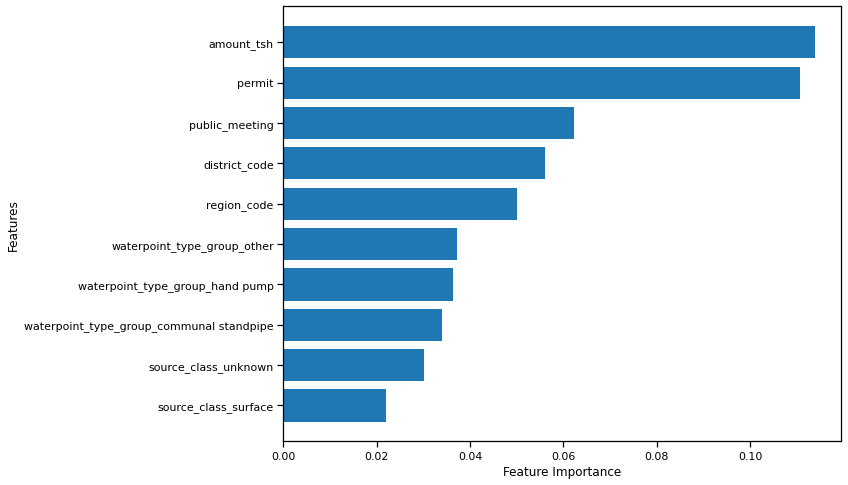

In [84]:
plot_feature_importance(final_model)

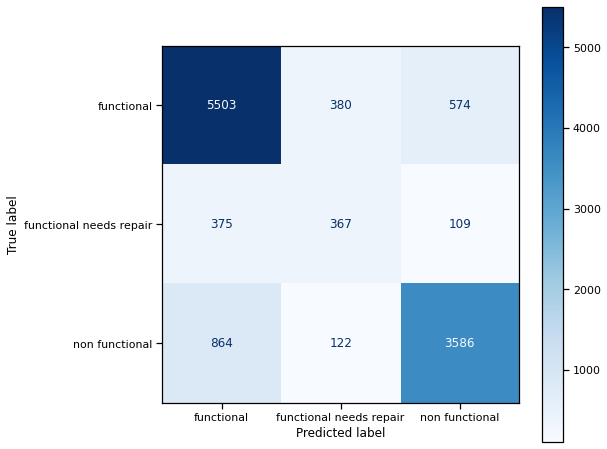

In [85]:
cnf_matrix = confusion_matrix(y_test,y_test_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=final_model.classes_)
fig, ax = plt.subplots(figsize=(8,8))
matrix.plot(cmap=plt.cm.Blues, ax=ax);

# Conclusion

The accuracy score of the model is 0.7937. That means that the model predicts the correct water pump functionality status 79.37% of the time.
The most important features according to the final model are age, population, latitude, longitude, gps_height, amount_tsh, permit, public_meeting, district code and region code. This features can be presented to the stakeholders(The government of Tanzania), to help them improve the maintenance/repair operations of water pumps.